<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-problem" data-toc-modified-id="The-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exporation" data-toc-modified-id="Data-exporation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exporation</a></span></li><li><span><a href="#The-linear-model" data-toc-modified-id="The-linear-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The linear model</a></span></li><li><span><a href="#The-optimal-linear-model" data-toc-modified-id="The-optimal-linear-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The optimal linear model</a></span></li></ul></div>

# Linear regression motivation

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

## The problem

In [3]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

We have 100 students, and we know:
 * how many hours they studied for their exam
 * what mark they got (0 to 100)

In [5]:
data.head(10)

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
5,560,40
6,367,26
7,861,73
8,59,20
9,514,85


In [6]:
data.sample(5)

,hours,mark
71,53,8
23,796,91
1,4,12
70,756,87
30,45,0


We would like to understand the relationship $$mark = f(hours)$$

So that we can **predict the expected mark** we will get by studying a given number of hours

## Data exporation

<AxesSubplot:xlabel='hours', ylabel='Count'>

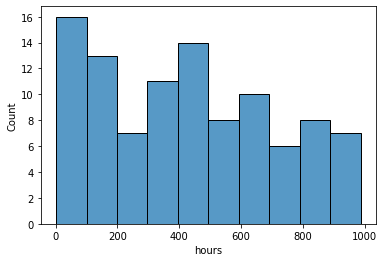

In [7]:
sns.histplot(data.hours, bins=10)

<AxesSubplot:xlabel='hours', ylabel='mark'>

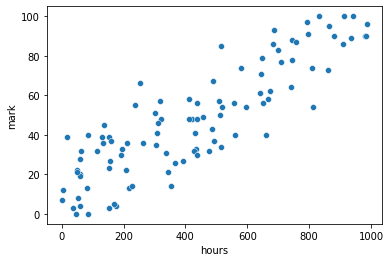

In [8]:
sns.scatterplot(x=data["hours"], y=data["mark"])

## The linear model

Lets try a linear regression $$Y = m * X + n$$

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

We want to find $m$ and $n$ that *best* model our data

Lets guess:

$$mark = 0.1 * horas$$

$$mark_2 =0.09 * horas + 5$$

Which model performs better?

In [11]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [12]:
data["prediction_1"] = 0.1 * data.hours

In [24]:
data["prediction_2"] = 0.09 * data.hours + 5

In [21]:
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [22]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3
0,865,95,86.5,82.85,45.25
1,4,12,0.4,5.36,47.15
2,305,35,30.5,32.45,52.00
3,437,56,43.7,44.33,46.82
4,682,86,68.2,66.38,58.86
5,560,40,56.0,55.40,47.36
6,367,26,36.7,38.03,55.82
7,861,73,86.1,82.49,43.34
8,59,20,5.9,10.31,47.40
9,514,85,51.4,51.26,58.62


Lets measure error of both models

Lets compute **Mean absolute error**

In [27]:
data['error_1'] = (data.mark - data.prediction_1).abs()

In [28]:
data['error_2'] = (data.mark - data.prediction_2).abs()

In [30]:
data['error_3'] = (data.mark - data.prediction_3).abs()

In [31]:
data.head(10)

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,82.85,45.25,8.5,12.15,49.75
1,4,12,0.4,5.36,47.15,11.6,6.64,35.15
2,305,35,30.5,32.45,52.00,4.5,2.55,17.00
3,437,56,43.7,44.33,46.82,12.3,11.67,9.18
4,682,86,68.2,66.38,58.86,17.8,19.62,27.14
5,560,40,56.0,55.40,47.36,16.0,15.40,7.36
6,367,26,36.7,38.03,55.82,10.7,12.03,29.82
7,861,73,86.1,82.49,43.34,13.1,9.49,29.66
8,59,20,5.9,10.31,47.40,14.1,9.69,27.40
9,514,85,51.4,51.26,58.62,33.6,33.74,26.38


In [32]:
data.error_1.mean()

12.675999999999998

In [33]:
data.error_2.mean()

12.0476

So model 2 performs better!

Lets plot our models

$$mark = 0.1 * horas$$

$$mark_2 =0.09 * horas + 5$$

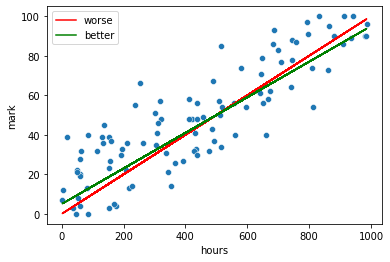

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')

plt.legend()

$$mark = m * hours + n$$

$$\text{model_error} = L(m, n)$$

$$L(0.1, 0) = 12.7$$

$$L(0.09, 5) = 12.04$$

## The optimal linear model

Can we find the **best**?

`scikit-learn` is a Python library for building ML models

Linear regression is now called a ML algorithm (years ago it was only basic statistical inference... you know, the hype)

In [ ]:
!pip install scikit-learn

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [49]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,82.85,45.25,8.5,12.15,49.75
1,4,12,0.4,5.36,47.15,11.6,6.64,35.15
2,305,35,30.5,32.45,52.00,4.5,2.55,17.00
3,437,56,43.7,44.33,46.82,12.3,11.67,9.18
4,682,86,68.2,66.38,58.86,17.8,19.62,27.14


In [54]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column

lr.fit(
    # X = data[["hours", "age", "n_bedrooms"]],
    X = data[["hours"]],
    y = data.mark
)

LinearRegression()

$$mark = m * hours + n$$

In [55]:
lr.coef_

array([0.08437787])

In [56]:
optimal_m = lr.coef_[0]

In [58]:
optimal_m

0.08437787096170372

In [59]:
optimal_n = lr.intercept_

In [60]:
optimal_n

11.78070717807148

$$mark = 0.084 * hours + 11.78$$

In [63]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,82.85,45.25,8.5,12.15,49.75
1,4,12,0.4,5.36,47.15,11.6,6.64,35.15
2,305,35,30.5,32.45,52.00,4.5,2.55,17.00
3,437,56,43.7,44.33,46.82,12.3,11.67,9.18
4,682,86,68.2,66.38,58.86,17.8,19.62,27.14


In [68]:
data["best_prediction"] = (data.hours * optimal_m + optimal_n).round(2)

In [69]:
data["best_prediction_error"] = (data.best_prediction - data.mark).abs()

In [73]:
data.shape

(100, 10)

In [70]:
data.head()

,hours,mark,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,best_prediction,best_prediction_error
0,865,95,86.5,82.85,45.25,8.5,12.15,49.75,84.77,10.23
1,4,12,0.4,5.36,47.15,11.6,6.64,35.15,12.12,0.12
2,305,35,30.5,32.45,52.00,4.5,2.55,17.00,37.52,2.52
3,437,56,43.7,44.33,46.82,12.3,11.67,9.18,48.65,7.35
4,682,86,68.2,66.38,58.86,17.8,19.62,27.14,69.33,16.67


In [72]:
data.best_prediction_error.mean()

11.4026

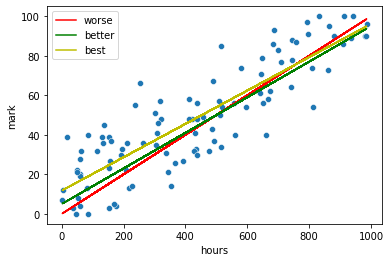

In [75]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='worse')
plt.plot(data.hours, data.prediction_2, color='g', label='better')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()

Discussion around non-symmetric metric

In [83]:
data2 = pd.DataFrame({"boxes": [100, 150, 160, 90, 220], "pred_1": [105, 153, 172, 93, 244], "pred_2": [98, 146, 166, 88, 214]})

In [84]:
data2

,boxes,pred_1,pred_2
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


In [86]:
data2["error_1"] = (data2.boxes - data2.pred_1).abs()
data2["error_2"] = (data2.boxes - data2.pred_2).abs()

In [87]:
data2

,boxes,pred_1,pred_2,error_1,error_2
0,100,105,98,5,2
1,150,153,146,3,4
2,160,172,166,12,6
3,90,93,88,3,2
4,220,244,214,24,6


In [88]:
data2.error_1.mean()

9.4

In [89]:
data2.error_2.mean()

4.0